In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

df = pd.DataFrame({
    'x': [1,2,3,24,25,26,49,50,51],
    'y': [1,2,3,24,25,26,49,50,51]
})

#print(df.iloc[0:1,1:2])
di=0.0
di1=0.0

from sklearn.cluster import KMeans
for i in range(2,5):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df)
    labels=kmeans.predict(df)
    labels=list(labels)
    centroids=kmeans.cluster_centers_
    #print(centroids)
    min_=centroids[1]-centroids[0]
    min_squared=min_[0]**2+min_[1]**2
    min_squared=min_squared**.5
    #dunn's Index
    for j in range(len(centroids)):
        for k in range(j+1,len(centroids)):
            dist=centroids[k]-centroids[j]
            dist_squared=dist[0]**2+dist[1]**2
            dist_squared=dist_squared**.5
            #print(dist_squared)
            if(dist_squared<min_squared):
                min_squared=dist_squared
    sum_=[]
    for j in range(len(centroids)):
        sum_.append(0)
    for j in range(len(labels)):
        for k in range(j+1,len(labels)):
            if(labels[j]==labels[k]):
                dist1=(df.iloc[j]['x']-df.iloc[j]['x'])**2+(df.iloc[j]['y']-df.iloc[k]['y'])**2
                #print(dist1)
                dist1_squared=dist1**.5
                sum_[labels[j]]=sum_[labels[j]]+dist1_squared
                   
    for j in range(len(centroids)):
        cn=labels.count(j)
        sum_[j]=(sum_[j])/(cn) # cannot allow (cn-1) as division by zero may occur
            
    #print(type(sum_))  
    #print(sum_)
    di=min_squared/max(sum_)
    if (di>di1):
        di1=di
        final_n=i
        continue
    else:
        break
print("Optimal Number of Clusters = ",final_n)
kmeans = KMeans(n_clusters=final_n)
kmeans.fit(df)
labels=kmeans.predict(df)
centroids=kmeans.cluster_centers_        
    
    
    



Optimal Number of Clusters =  3


In [2]:
print (centroids)

[[ 2.  2.]
 [50. 50.]
 [25. 25.]]


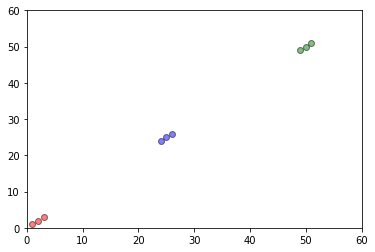

In [3]:
colmap={1:'r',2:'g',3:'b'}
for i in range(9):
    plt.scatter(df.iloc[i:i+1,0:1],df.iloc[i:i+1,1:2],color=colmap[labels[i]+1],alpha=0.5,edgecolor='k')
plt.xlim(0,60)
plt.ylim(0,60)
plt.show()    


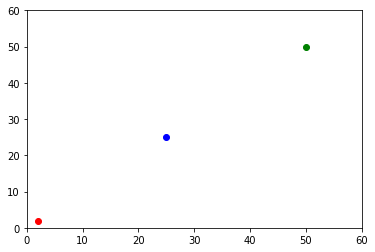

In [4]:
for i,c in enumerate(centroids):
    plt.scatter(*c,color=colmap[i+1])
plt.xlim(0,60)
plt.ylim(0,60)
plt.show()

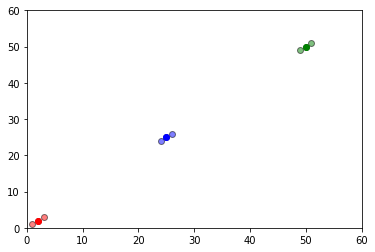

In [5]:
for i in range(9):
    plt.scatter(df.iloc[i:i+1,0:1],df.iloc[i:i+1,1:2],color=colmap[labels[i]+1],alpha=0.5,edgecolor='k')   
for i,c in enumerate(centroids):
    plt.scatter(*c,color=colmap[i+1])
plt.xlim(0,60)
plt.ylim(0,60)
plt.show()